In [1]:
%matplotlib inline
from matplotlib.pyplot import figure, gcf

In [57]:
from numpy import linspace

In [66]:
x0, xf = 2, 10
dx = 0.4
linspace(x0, xf, int((xf - x0)/dx + 1))

array([ 2. ,  2.4,  2.8,  3.2,  3.6,  4. ,  4.4,  4.8,  5.2,  5.6,  6. ,
        6.4,  6.8,  7.2,  7.6,  8. ,  8.4,  8.8,  9.2,  9.6, 10. ])

In [235]:
def graficar(xs, ys, cursores_x={}, cursores_y={}, asintota=[], tamaño=(9, 6), imprimir_etiquetas=True, grid_x=0, grid_y=0, archivo=""):
    
    def imprimir_grid_x(x0, xf, dx, margenes_y, axis):
        posiciones_x = linspace(x0, xf, int((xf - x0)/dx + 1))
        for pos in posiciones_x:
            axis.plot([pos, pos], [margenes_y[0], margenes_y[1]], ':k', linewidth=0.5)
            
    def imprimir_grid_y(y0, yf, dy, margenes_x, axis):
        posiciones_y = linspace(y0, yf, int((yf - y0)/dy + 1))
        for pos in posiciones_y:
            axis.plot([margenes_x[0], margenes_x[1]], [pos, pos], ':k', linewidth=0.5)
        
    def imprimir_cursores(cursores, margenes, eje, axis, δ):
        etiquetas = cursores.keys()
        if eje is "x":
            for etiqueta in etiquetas:
                valor = cursores[etiqueta]
                axis.plot([valor, valor], [margenes[0], margenes[1]], '--r', linewidth=2.0)
                axis.text(valor, -δ, etiqueta, color='red')
        if eje is "y":
            for etiqueta in etiquetas:
                valor = cursores[etiqueta]
                axis.plot([margenes[0], margenes[1]], [valor, valor], '--r', linewidth=2.0)
                axis.text(-10*δ, valor, etiqueta, horizontalalignment="right", color='red')
                
    from matplotlib.pyplot import figure
    from matplotlib import rc
    rc('font',**{'family':'sans-serif','sans-serif':['Noto Sans'], 'size':20.0})
    #rc('font',**{'family':'serif','serif':['Palatino'], 'size':14.0})
    #rc('text', usetex=True)
    
    δx = 0.01*abs(max(xs) - min(xs))
    δy = 0.01*abs(max(ys) - min(ys))
    
    margenes_x = [min(xs) - δx, max(xs) + δx]
    margenes_y = [min(ys) - δy, max(ys) + δy]
    
    fig = figure(figsize=tamaño)
    fig.tight_layout()
    ax = fig.gca()

    ax.axes.spines["top"].set_color("none")
    ax.axes.spines["right"].set_color("none")
    ax.tick_params(top=False, right=False)

    ax.axes.spines["left"].set_position("zero")
    #ax.axes.spines["left"].set_axisline_style("->")
    ax.axes.spines["bottom"].set_position("zero")
    ax.spines["left"].set_linewidth(3)
    ax.spines["bottom"].set_linewidth(3)

    ax.plot(xs, ys, 'k',linewidth=3.0)
    ax.axes.set_xlim(margenes_x[0], margenes_x[1])
    ax.axes.set_ylim(margenes_y[0], margenes_y[1])
    fig.canvas.draw()
    
    if len(asintota) > 0:
        ax.plot(asintota[0], asintota[1], "--r", linewidth=2.0)
    
    #for direction in ["xzero", "yzero"]:
    #    ax.axis[direction].set_visible(True)
    #    ax.axis[direction].set_axisline_style("->")
    
    if imprimir_etiquetas == False:
        ax.axes.get_xaxis().set_ticks([])
        ax.axes.get_yaxis().set_ticks([])
        
    if len(cursores_x) > 0:
        imprimir_cursores(cursores_x, margenes_y, "x", ax, δx)
    if len(cursores_y) > 0:
        imprimir_cursores(cursores_y, margenes_x, "y", ax, δy)
    
    if grid_x > 0:
        imprimir_grid_x(min(xs), max(xs), abs(max(xs) - min(xs))/grid_x, margenes_y, ax)
    if grid_y > 0:
        imprimir_grid_y(min(ys), max(ys), abs(max(ys) - min(ys))/grid_y, margenes_x, ax)

    labels = ax.xaxis.get_ticklabels()
    for label in labels:
        if label.get_text() == r'$0$' or label.get_text() == r'$0.0$':
            label.set_visible(False)

    labels = ax.yaxis.get_ticklabels()
    for label in labels:
        if label.get_text() == r'$0$' or label.get_text() == r'$0.0$':
            label.set_visible(False)
            
    if len(archivo) > 0:
        fig.savefig(archivo, transparent=True)
    return ax

In [236]:
from control import tf, impulse_response, step_response
from numpy import linspace, exp

In [237]:
G = tf([1],[1, 1, 1])
t = linspace(0, 10, 100)
t,y = impulse_response(G, t)
ya = exp(-0.5*t+0.2)+0.05

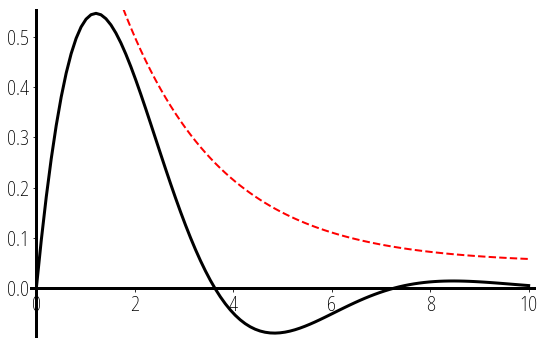

In [238]:
ax2 = graficar(t,y, asintota=[t,ya], archivo="est_exp.png")

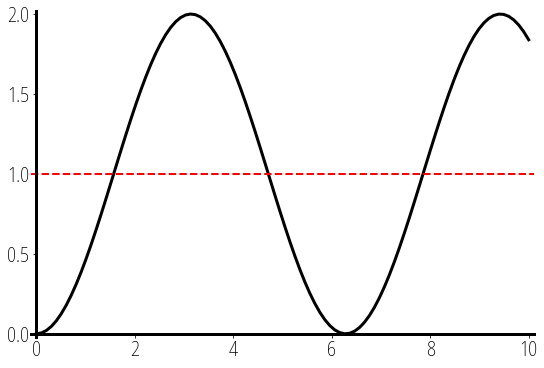

In [271]:
G = tf([1],[1, 0, 1])
t = linspace(0, 10, 100)
t,y = step_response(G, t)
ax2 = graficar(t, y, cursores_y={r" ":1}, archivo="critica.png")

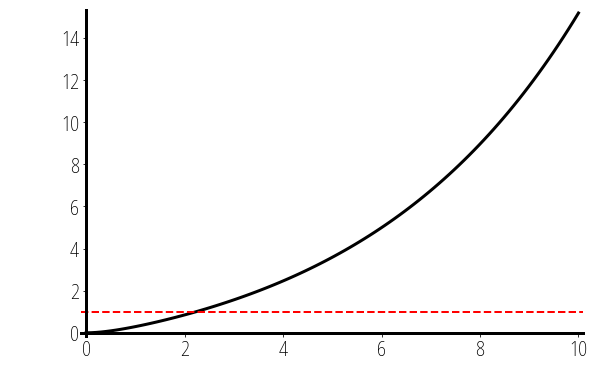

In [270]:
G = tf([1],[1, 2, -0.5])
t = linspace(0, 10, 100)
t,y = step_response(G, t)
ax2 = graficar(t, y, cursores_y={r" ":1}, archivo="inestable.png")

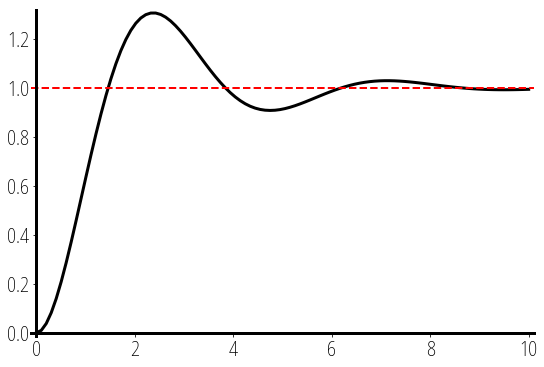

In [295]:
G = tf([2],[1, 1, 2])
t = linspace(0, 10, 100)
t,y = step_response(G, t)
ax2 = graficar(t, y, cursores_y={r" ":1}, archivo="estable.png")

([8.5],
 [7.65, 1.0774410774410776],
 [10.200000000000001, 0.6464646464646465, 0.16161616161616163])

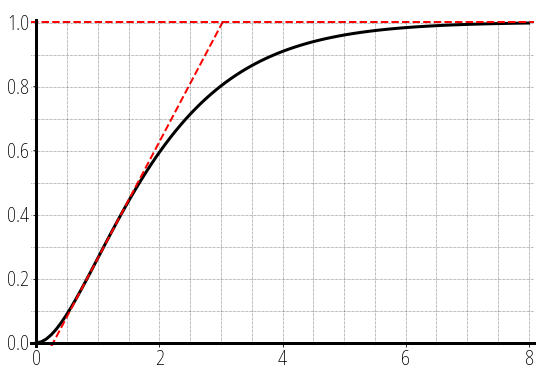

In [330]:
G = tf([1],[1, 2, 1])
t = linspace(0, 8, 100)
t,y = step_response(G, t)

funcs = []
for i, q in enumerate(y):
    if abs(q - 0.2) <0.01:
        funcs.append(tangente(t[i], t[i+1], y[i], y[i+1]))
asin = funcs[int(len(funcs)/2)]

ya = asin(t)
ax3 = graficar(t,y, cursores_y={r" ":1}, asintota=[t, ya], grid_x=16, grid_y=10, archivo="sint-esc1.png")

cands = []
for i, q in enumerate(ya):
    if abs(q) < 0.02:
        cands.append(i)

L = t[cands[int(len(cands)/2)]]

cands = []
for i, q in enumerate(ya):
    if abs(q-1) < 0.02:
        cands.append(i)
T = t[cands[int(len(cands)/2)]] - L

P = [T/L]
PI = [0.9*T/L, L/0.3]
PID = [1.2*T/L, 2*L, 0.5*L]
P, PI, PID

([3.1538461538461537],
 [2.838461538461538, 4.814814814814815],
 [3.784615384615384, 2.888888888888889, 0.7222222222222222])

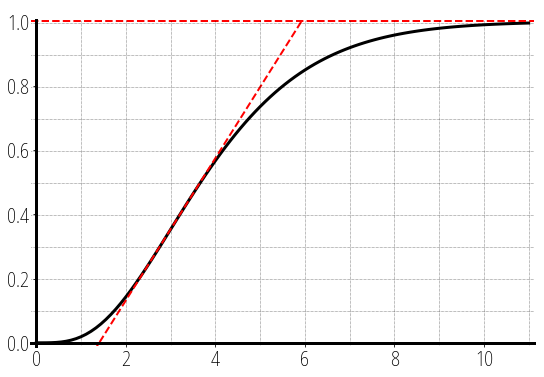

In [331]:
G = tf([1],[1, 4, 6, 4, 1])
t = linspace(0, 11, 100)
t,y = step_response(G, t)

funcs = []
for i, q in enumerate(y):
    if abs(q - 0.4) <0.01:
        funcs.append(tangente(t[i], t[i+1], y[i], y[i+1]))
asin = funcs[int(len(funcs)/2)]

ya = asin(t)
ax3 = graficar(t,y, cursores_y={r" ":1}, asintota=[t, ya], grid_x=11, grid_y=10, archivo="sint-esc2.png")

cands = []
for i, q in enumerate(ya):
    if abs(q) < 0.02:
        cands.append(i)

L = t[cands[int(len(cands)/2)]]

cands = []
for i, q in enumerate(ya):
    if abs(q-1) < 0.02:
        cands.append(i)
T = t[cands[int(len(cands)/2)]] - L

P = [T/L]
PI = [0.9*T/L, L/0.3]
PID = [1.2*T/L, 2*L, 0.5*L]
P, PI, PID

In [306]:
def tangente(x1, x2, y1, y2):
    m = (y2 - y1)/(x2 - x1)
    b = y1 - m*x1
    return lambda x: m*x + b

([2.4666666666666663],
 [2.22, 7.070707070707071],
 [2.96, 4.242424242424242, 1.0606060606060606])

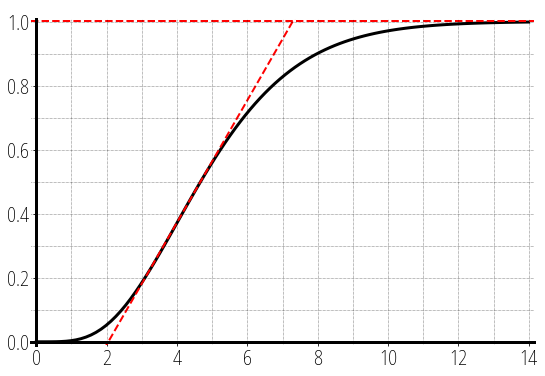

In [332]:
G = tf([1],[1, 5, 10, 10, 5, 1])
t = linspace(0, 14, 100)
t,y = step_response(G, t)

funcs = []
for i, q in enumerate(y):
    if abs(q - 0.45) <0.01:
        funcs.append(tangente(t[i], t[i+1], y[i], y[i+1]))
asin = funcs[int(len(funcs)/2)]

ya = asin(t)
ax3 = graficar(t,y, cursores_y={r" ":1}, asintota=[t, ya], grid_x=14, grid_y=10, archivo="sint-esc3.png")

cands = []
for i, q in enumerate(ya):
    if abs(q) < 0.02:
        cands.append(i)

L = t[cands[int(len(cands)/2)]]

cands = []
for i, q in enumerate(ya):
    if abs(q-1) < 0.02:
        cands.append(i)
T = t[cands[int(len(cands)/2)]] - L

P = [T/L]
PI = [0.9*T/L, L/0.3]
PID = [1.2*T/L, 2*L, 0.5*L]
P, PI, PID